# Machine Learning

## Answer 1

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import hstack

In [2]:
df= pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Pre Placement Assesment\\Placement-assignment_Pranit-Anap\\Machine Learning\\instagram_reach.csv")
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [3]:
df =df.drop(["Unnamed: 0", "S.No"], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [5]:
df["Time since posted"] = df['Time since posted'].str.replace("hours", "")

In [6]:
df["Time since posted"] = df["Time since posted"].astype(int)

In [7]:
# lets know what people in this data set are talking about
def WordCloudPlotter(dfColumn):
    colData = df[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = STOPWORDS,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 

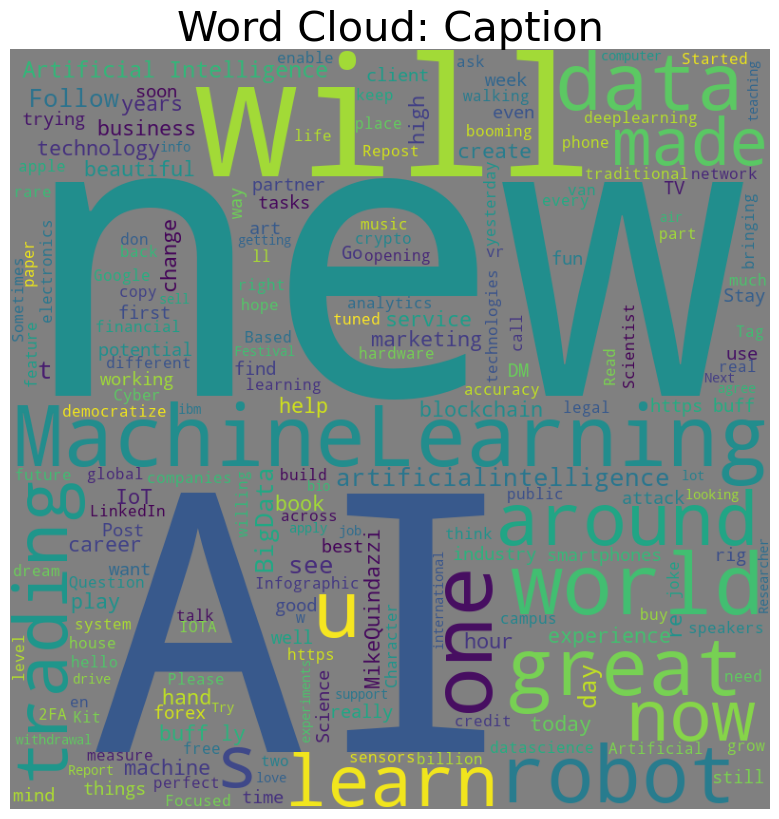

In [8]:
WordCloudPlotter("Caption")

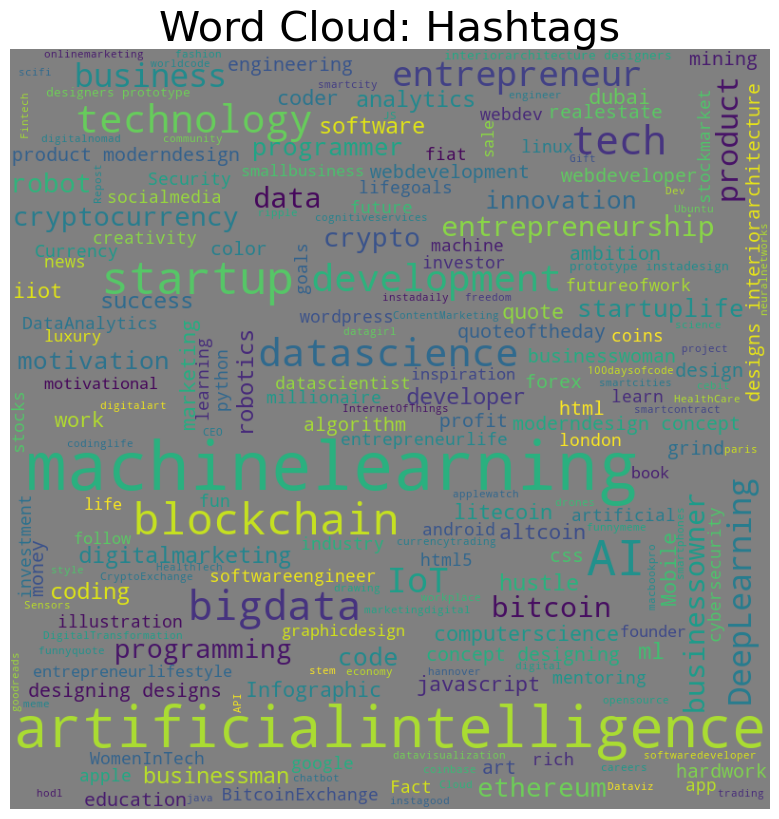

In [9]:
WordCloudPlotter("Hashtags")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9892\1804056721.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(followers_boxcox)


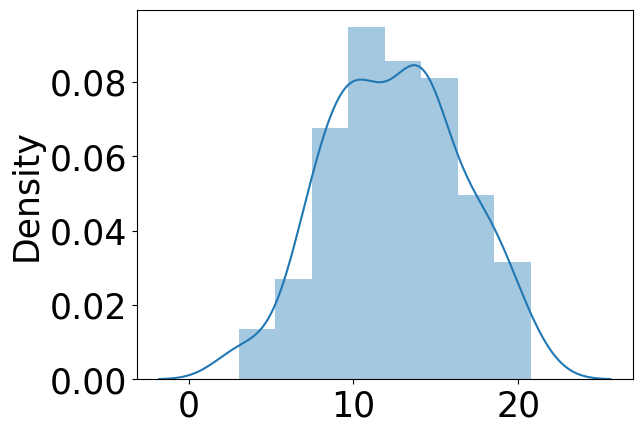

In [10]:
from scipy import stats

# Applying box_cox transformation
followers_boxcox = stats.boxcox(df['Followers'])[0]

# Checking distribution after transformation
sns.distplot(followers_boxcox)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9892\4045684853.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


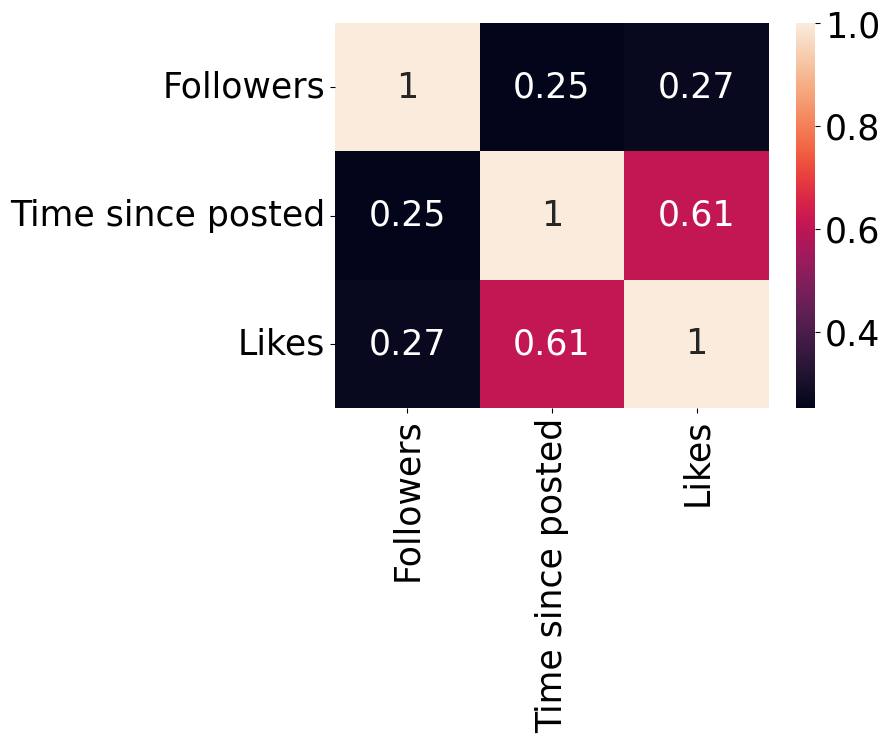

In [11]:
plt.figure(figsize=(7,5))
correlation_matrix = df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [12]:
df= df.replace(np.nan, "no caption")

## PREDICTING LIKES AND TIME SINCE POSTED USING ALL OTHER FEATURES AS INPUT

In [13]:
vectorizer = CountVectorizer()
X_caption = vectorizer.fit_transform(df['Caption'])
X_hashtags = vectorizer.fit_transform(df['Hashtags'])

# Converting non-textual features to sparse matrices
X_username = pd.get_dummies(df['USERNAME'], sparse=True)
X_followers = pd.get_dummies(df['Followers'], sparse=True)

# Combining all features
X = hstack([X_username, X_caption, X_followers, X_hashtags])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df[['Likes', 'Time since posted']], test_size=0.2, random_state=42)

# Training the regression model for Likes
model_likes = LinearRegression()
model_likes.fit(X_train, y_train['Likes'])

# Making predictions for Likes
y_pred_likes = model_likes.predict(X_test)

# Training the regression model for Time since posted
model_time = LinearRegression()
model_time.fit(X_train, y_train['Time since posted'])

# Making predictions for Time since posted
y_pred_time = model_time.predict(X_test)

# Evaluating the models
mse_likes = mean_squared_error(y_test['Likes'], y_pred_likes)
rmse_likes = mean_squared_error(y_test['Likes'], y_pred_likes, squared=False)
mse_time = mean_squared_error(y_test['Time since posted'], y_pred_time)
rmse_time = mean_squared_error(y_test['Time since posted'], y_pred_time, squared=False)

print("Likes - Mean Squared Error:", mse_likes)
print("Likes - Root Mean Squared Error:", rmse_likes)
print("Time since posted - Mean Squared Error:", mse_time)
print("Time since posted - Root Mean Squared Error:", rmse_time)

Likes - Mean Squared Error: 1685.7783013351757
Likes - Root Mean Squared Error: 41.05823061622573
Time since posted - Mean Squared Error: 12.228287789937315
Time since posted - Root Mean Squared Error: 3.4968968800834426


## PREDICTING LIKES USING CAPTION AS INPUT

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Caption'])


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Likes'], test_size=0.2, random_state=42)

# Training the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2020.4155136060847
Root Mean Squared Error: 44.949032398997026


## PREDICTING LIKES USING HASHTAGS AS INPUT

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Hashtags'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Likes'], test_size=0.2, random_state=42)

# Training the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2831.7817524166485
Root Mean Squared Error: 53.214488181477876


## PREDICTING TIME SINCE POSTED USING CAPTION AS INPUT

In [16]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Caption'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Time since posted'], test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 14.60926559671719
Root Mean Squared Error: 3.8222069013486424
